#### Averaging Kernel

In [1]:
# import numpy
import numpy as np
import cv2

In [2]:
# Load an image
image = cv2.imread('lenna.png')

# Define a 3 X 3 averaging kernel
kernel = np.ones((3,3),np.float32)/ 9

# apply the kernel to smooth the image
smoothed_image = cv2.filter2D(image, -1, kernel)


# show the  original & smoothed image 
cv2.imshow('Original', image)
cv2.imshow('Smoothed', smoothed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [4]:
# Load an image
image = cv2.imread('lenna.png')

# Define a 3 X 3 averaging kernel
kernel = np.ones((5,5),np.float32)/ 25

# apply the kernel to smooth the image
smoothed_image = cv2.filter2D(image, -1, kernel)


# show the  original & smoothed image 
cv2.imshow('Original', image)
cv2.imshow('Smoothed', smoothed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

### Guassian Kernel

In [6]:
gray = cv2.imread('lenna.png',0)
gray.shape

(512, 512)

In [7]:
blurred = cv2.filter2D(gray, -1, kernel) # Apply filter

In [8]:
import matplotlib.pyplot as plt

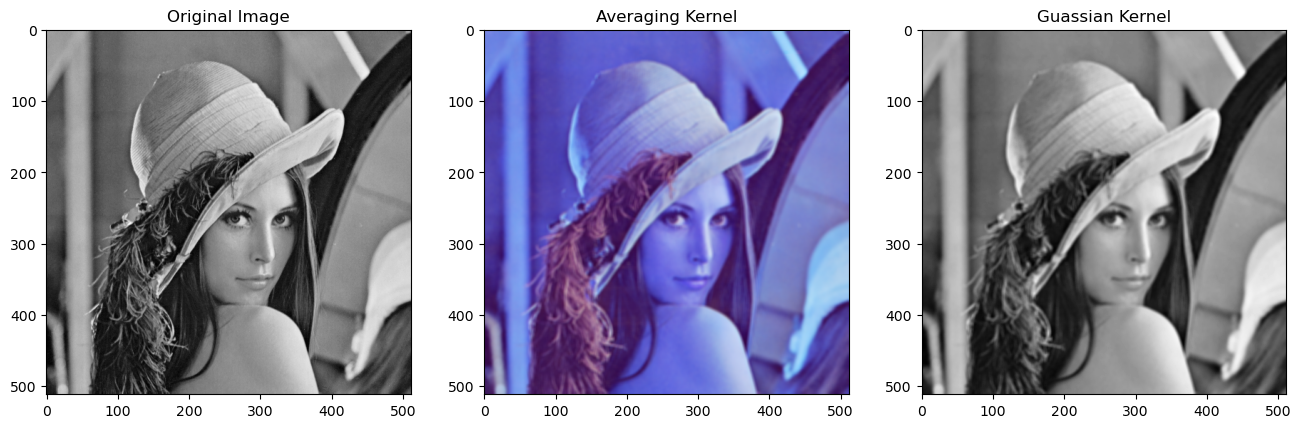

In [9]:
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(gray,cmap ='gray');
plt.subplot(1,3,2)
plt.title('Averaging Kernel')
plt.imshow(smoothed_image,cmap ='gray');
plt.subplot(1,3,3)
plt.title('Guassian Kernel')
plt.imshow(blurred,cmap ='gray');

In [10]:
gray

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

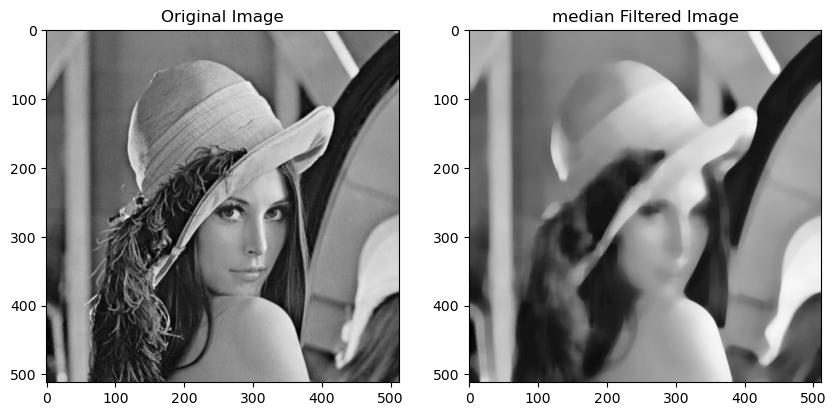

In [11]:
kernel_size = 19
median = cv2.medianBlur(gray, kernel_size)
plt.figure(figsize=(10,6))
plt.subplot(121), plt.imshow(gray,cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(median,cmap='gray'), plt.title('median Filtered Image')
plt.show()


In [12]:
kernel_size = 19
median = cv2.medianBlur(image, kernel_size)
plt.figure(figsize=(10,6))

new_img = np.hstack([image,median])

cv2.imshow('Final', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
new_img = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
plt.imsave('image.png',new_img)

<Figure size 1000x600 with 0 Axes>

### Bilateral Filter

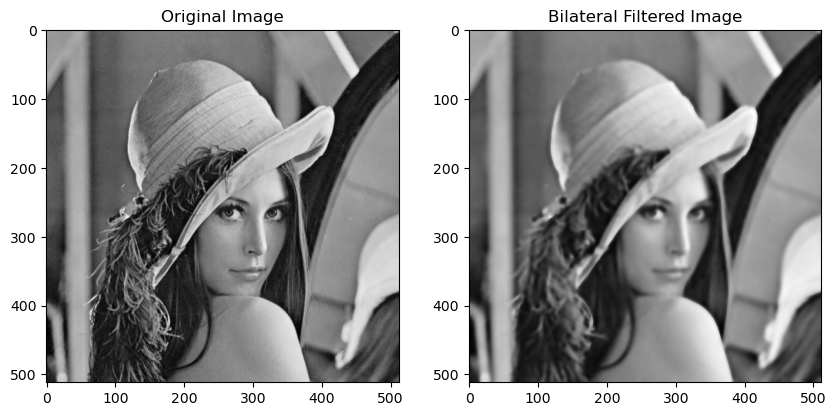

In [13]:
import numpy as np
import cv2

image = cv2.imread('lenna.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

bilateral = cv2.bilateralFilter(gray,d=9,sigmaColor=95, sigmaSpace=75) # adjust the parameter
plt.figure(figsize=(10,6))
plt.subplot(121), plt.imshow(gray,cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(bilateral,cmap='gray'), plt.title('Bilateral Filtered Image')
plt.show()

### Combining all 4

In [19]:
kernel_size = 19
median = cv2.medianBlur(image, kernel_size)
bilateral = cv2.bilateralFilter(image,d=9,sigmaColor=95, sigmaSpace=75) # adjust the parameter
gausian_blurred = cv2.filter2D(image, -1, kernel) # Apply filter

new_img = np.hstack([image,gausian_blurred])
new_img1 = np.hstack([median,bilateral])
new = np.vstack([new_img,new_img1])

cv2.imshow('Final', new)
cv2.waitKey(0)
cv2.destroyAllWindows()
